# 1. Perkenalan


Jimmy Jaya Nugraha

## Data yang digunakan: 

Telcom Customer Churn
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

    Customers who left within the last month – the column is called Churn
    Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    Demographic info about customers – gender, age range, and if they have partners and dependents

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv

## Penjelasan dari setiap kolom fitur
- customerID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure :Number of months the customer has stayed with the company
- phoneService : Whether the customer has phone service or not (Yes, No)
- multipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- internetService : Whether the customer has internet service or not (DSL, Fiber optic, No)
- onlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- onlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- deviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- techSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- streamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- streamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- paperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- paymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- monthlyCharges : The amount charged to the customer monthly
- totalCharges : The total amount charged to the customer
- Churn : Whether the customer has churned or not (Yes, No)

# 2. Import library
Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

# 3. Data Loading
Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Meload dataset
df_ori = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Menduplikat dataset
df = df_ori.copy()

In [4]:
# Melihat data head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
# melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> data terlihat ada yang masih belum sesuai tipenya sepertui `TotalCharges` yang seharusnya berisi angka

In [40]:
# mengecek kolom TotalCharges yang isinya ' '
df[df['TotalCharges']==' '].head().T

,488,753,936,1082,1340
customerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ
gender,Female,Male,Female,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes
Dependents,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No
MultipleLines,No phone service,No,No,Yes,No phone service
InternetService,DSL,No,DSL,No,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes


In [41]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [42]:
# melihat jumlah data yang kolom Total chargenya ' '
df[df['TotalCharges']==' ']['TotalCharges'].count()

11

> kolom TotalCharges tidak dapat diketahui besarannya secara pasti, terlihat kolom ini memiliki hubungan yang sangat erat dari monthlycharges dan tenure. Namun, berhubung data ' ' hanya ada 11 row , maka akan dilakukan drop kolom.

In [43]:
# Cek index kolom TotalCharges yang isinya ' '
df[df['TotalCharges']==' '].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [44]:
# drop kolom TotalCharges yang isinya ' '
df.drop(index=df[df['TotalCharges']==' '].index, inplace=True)

In [45]:
# mengubah TotalCharges menjadi float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# 4. Exploratory Data Analysis (EDA)
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [47]:
#melihat describe data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


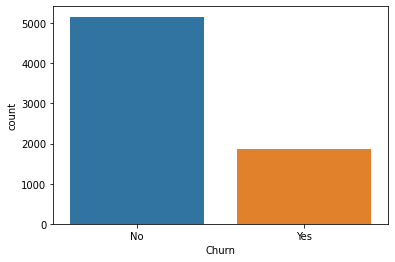

In [48]:
# melihat value count dari kolom Churn
sns.countplot(data = df, x='Churn')
plt.show()

In [6]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

> terlihat datanya imbalance  antara yang churn yes dan no

In [49]:
# melihat unique dari setiap kolom fitur
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

> kolom customer ID akan didrop karena bersifat unik pada setiap barisnya dan dianggap tidak mempengaruhi hasil.

In [50]:
# drop kolom customerID
df.drop(columns=['customerID'], inplace=True)

In [51]:
# melihat nilai unik dari setiap kolom yang jumlah uniknya <5
unik = df.nunique()[df.nunique()<5].reset_index().rename(columns={'index':'Fitur', 0:'nunique'})
nilai_unik =[]
for i in unik['Fitur']:
    nilai_unik.append(df[i].unique())
unik['nilai_unik'] = nilai_unik
unik

,Fitur,nunique,nilai_unik
0,gender,2,"[Female, Male]"
1,SeniorCitizen,2,"[0, 1]"
2,Partner,2,"[Yes, No]"
3,Dependents,2,"[No, Yes]"
4,PhoneService,2,"[No, Yes]"
5,MultipleLines,3,"[No phone service, No, Yes]"
6,InternetService,3,"[DSL, Fiber optic, No]"
7,OnlineSecurity,3,"[No, Yes, No internet service]"
8,OnlineBackup,3,"[Yes, No, No internet service]"
9,DeviceProtection,3,"[No, Yes, No internet service]"


> terlihat tidak ada kesalahan pengetikan atau unexpected missing value pada data tersebut

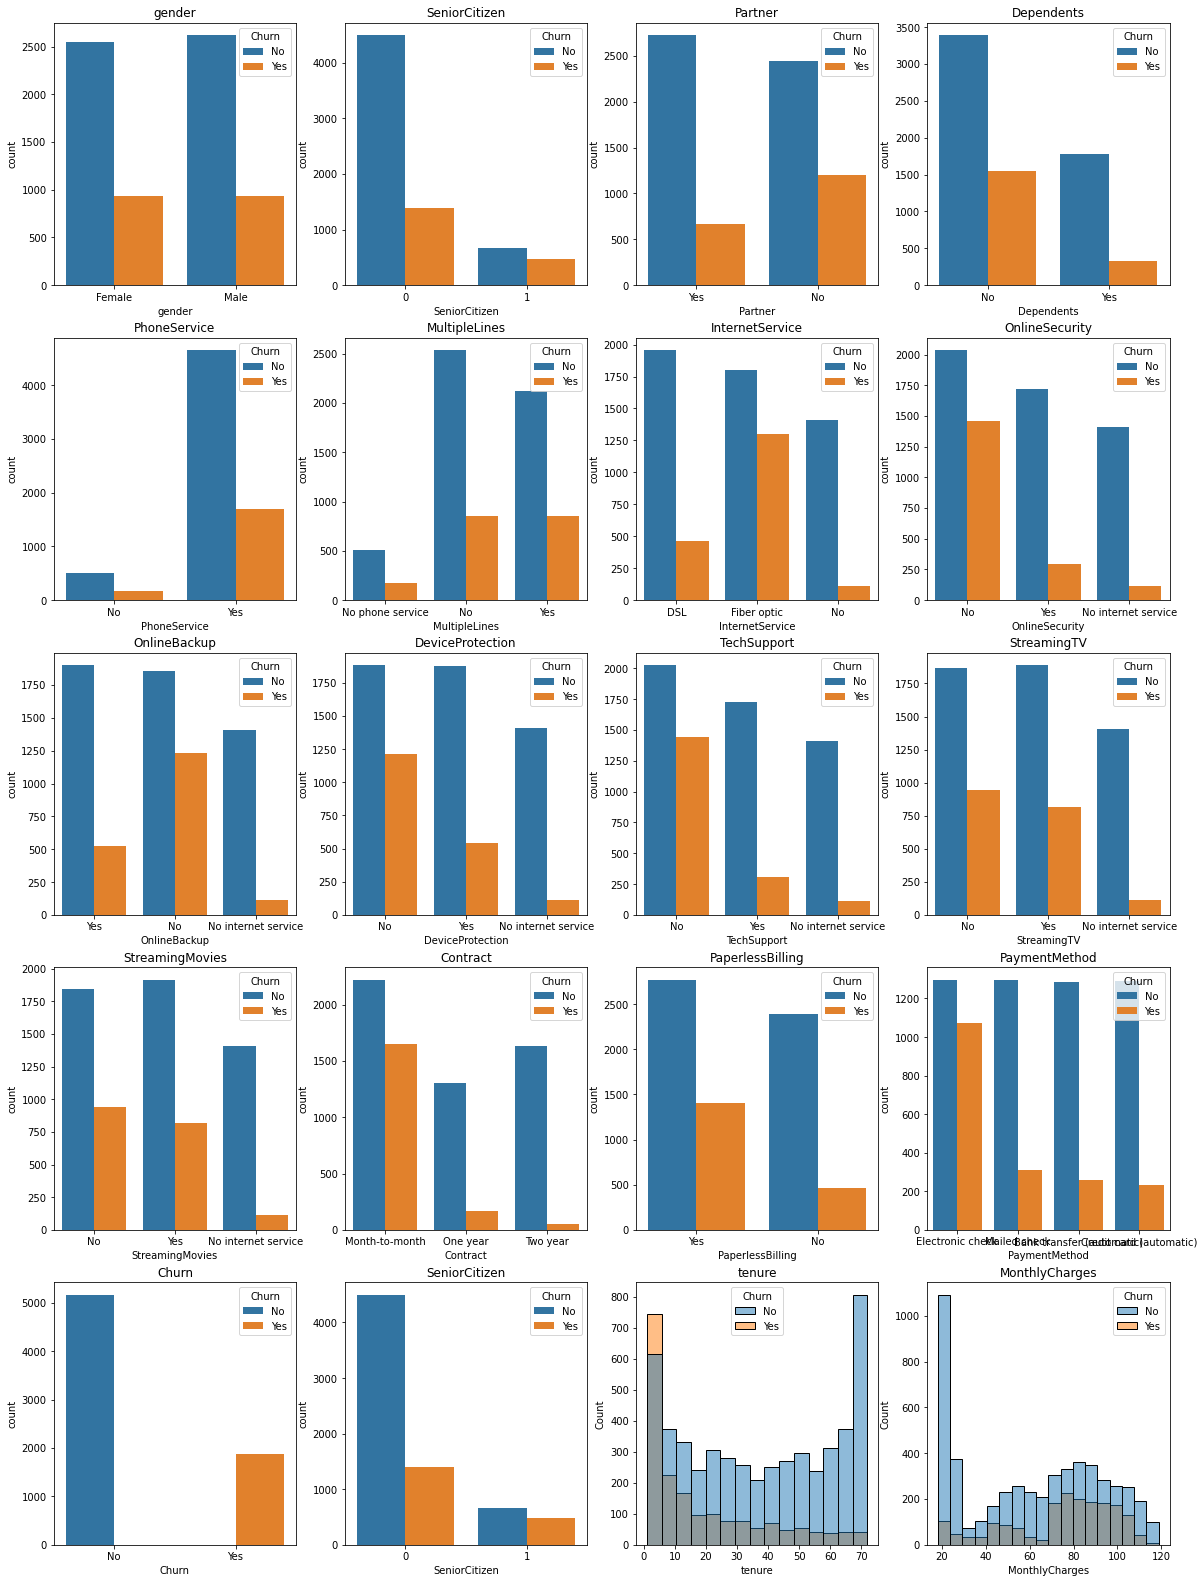

In [52]:
# Membuat grafik untuk eksplorasi setiap fitur
ncol=4
nrow=5

# melist semua subplots
axes=[]
for x in range(nrow):
    for y in range(ncol):
        axes.append((x,y))

# membuat grafik countplot untuk data kategorical
fig, ax = plt.subplots(ncols=ncol,nrows=nrow, figsize=(4*nrow,7*ncol))
for h,i in enumerate(unik['Fitur']):
    sns.countplot(data = df, x=i,hue='Churn' ,ax=ax[axes[h]])
    ax[axes[h]].set_title(i)

# membuat grafik untuk data fitur lainnya
sns.countplot(data = df, x='SeniorCitizen', hue='Churn', ax=ax[4,1])
ax[4,1].set_title('SeniorCitizen')
sns.histplot(data = df, x='tenure',hue='Churn', ax=ax[4,2])
ax[4,2].set_title('tenure')
sns.histplot(data = df, x='MonthlyCharges',hue='Churn', ax=ax[4,3])
ax[4,3].set_title('MonthlyCharges')

plt.show()

> Terlihat beberapa data kategoricalnya timpang, data paling banyak berisi yang bukan senior citizen, tidak memiliki dependents, memiliki phone services dan internet, tidak memiliki online security, contract month to month, bukan senior citizen, dan customer yang tidak churn

> Dan yang memiliki kecenderungan churn adalah customer yang memiliki kriteria: tidak memiliki partner, tidak memiliki dependent, memiliki internet service fiberoptic, tidak memiliki online security, online backup, online deviceprotection, dan tech support, pembayaran dengan electronic check, dan memiliki tenure yang cenderung kecil.

# 5. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Memisahkan data train, data test, dan inference

In [53]:
# Mendefinisikan variabel target
target = 'Churn'

# Memisahkan Inference-set from dataset
df_inf =df.sample(10, random_state=25)
df_inf.reset_index(drop=True, inplace=True)
X_inf = df_inf.drop(target, axis=1)
y_inf = df_inf[target]

# Mendrop data yang dijadikan df_inf dan reset index
df_tanpa_inf=df.drop(df_inf.index)
df_tanpa_inf.reset_index(drop=True, inplace=True)

# Memisahkan target dan data
X =df_tanpa_inf.drop(target, axis=1)
y =df_tanpa_inf[target]

# Memisahkan data training, validation, dan test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state=25, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size =0.2,random_state=25, stratify=y_train)

# Melihat jumlah train set dan test set
print('X_train :',X_train.shape)
print('X_val :',X_val.shape)
print('X_test :',X_test.shape)
print('X_inf :',X_inf.shape)

X_train : (4493, 19)
X_val : (1124, 19)
X_test : (1405, 19)
X_inf : (10, 19)


## Feature Splitting

In [54]:
# Melist kolom numerikal
num_columns = ['tenure','MonthlyCharges','TotalCharges']

# Melist kolom kategorical
cat_columns =[]
for i in X_train.columns:
    if i not in num_columns:
        cat_columns.append(i)

In [55]:
# memisahkan kolom numerikal dan kolom kategorical
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]
X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]
X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]


## Handling Outlayer

In [56]:
# Membuat fungsi remove outlayer normal distribution
def remove_outlayer_normal (data, y_pasangan, column):
    mean = data[column].mean()
    std = data[column].std()
    outlayer = data[column][(data[column] < mean - 3*std) | (data[column] > mean + 3*std)]
    data.drop(outlayer.index, inplace=True)
    data.reset_index()
    y_pasangan.drop(outlayer.index, inplace=True)
    y_pasangan.reset_index()
    if outlayer.index.shape[0]==0:
        print('Kolom',column ,'tidak memiliki outlayer')
    else:
        print('Shape setelah drop outlayer (normal) di kolom',column,' : ',data.shape)
    return data, y_pasangan
    

# Membuat fungsi remove outlayer skewed distribution
def remove_outlayer_skewed (data,y_pasangan, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    outlayer = data[column][(data[column] < q1 - 3*iqr) | (data[column] > q3 + 3*iqr)]
    data.drop(outlayer.index, inplace=True)
    data.reset_index()
    y_pasangan.drop(outlayer.index, inplace=True)
    y_pasangan.reset_index()
    if outlayer.index.shape[0]==0:
        print('Kolom',column ,'tidak memiliki outlayer')
    else:
        print('Shape setelah drop outlayer (skewed) di kolom',column,' : ',data.shape)
    return data, y_pasangan

# Menggabungkan fungsi remove outlayer normal dan skewed
def remove_outlayer_all (X_data, y_data, column):
    awal = X_data.shape[0]
    print('shape awal :', X_data.shape)
    for i in X_data[column]:
        if X_data[i].skew()>0.5:
            remove_outlayer_skewed(X_data, y_data, i)
        else:
            remove_outlayer_normal(X_data, y_data, i)
    akhir = X_data.shape[0]
    print('Jumlah data awal : ', awal)
    print('Jumlah data akhir: ', akhir)
    print('persentase selisih : ', ((awal-akhir)/awal)*100,'%')
    return X_data, y_data

In [57]:
# Meremove outlayer dari data training
X_train, y_train = remove_outlayer_all(X_train, y_train, num_columns)

shape awal : (4493, 19)
Kolom tenure tidak memiliki outlayer
Kolom MonthlyCharges tidak memiliki outlayer
Kolom TotalCharges tidak memiliki outlayer
Jumlah data awal :  4493
Jumlah data akhir:  4493
persentase selisih :  0.0 %


> Tidak ada outlayer dalam data tersebut sehingga tidak ada yang didrop row.

## Handling Missing Value

In [58]:
# Melihat ada tidaknya missing value
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

> Tidak ada missing value dalam data tersebut sehingga tidak dilakukan handling missing value

## Feature Scaling and Encoding

In [59]:
# membuat data_pipeline untuk encode dan scaling
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'),
                             MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [60]:
# Melakukan Fit Hanya pada data training
data_pipeline.fit(X_train)

# Melakukan transform pada data training, validation, dan test
X_train_final = data_pipeline.transform(X_train)
X_val_final = data_pipeline.transform(X_val)
X_test_final = data_pipeline.transform( X_test)

In [61]:
# Melihat shape X_train_final, X_val_final, dan X_test_final
print('Shape X_train_final :', X_train_final.shape)
print('Shape X_val_final :', X_val_final.shape)
print('Shape X_test_final :', X_test_final.shape)

Shape X_train_final : (4493, 46)
Shape X_val_final : (1124, 46)
Shape X_test_final : (1405, 46)


## Encoding target y dengan label encoder agar jadi 0,1

In [62]:
#Encoding target y dengan label encoder
le = LabelEncoder()
y_train_final = le.fit_transform(y_train)
y_val_final = le.transform(y_val)
y_test_final = le.transform(y_test)

## Input data pipeline dengan tf data

In [63]:
# input pipeline dengan tf.data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train_final)).shuffle(2).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val_final)).shuffle(2).batch(32)

# 6. Model Definition and Training
Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Pembuatan Arsitektur Neural Network

### Sequential API

In [32]:
X_val_final.shape

(1124, 46)

In [33]:
# Membuat arsitektur Sequential API
model = Sequential()
model.add(Dense(units=30, activation='relu', input_shape=(X_train_final.shape[1],))) # hidden layer 1
model.add(Dense(units=15, activation='relu')) # hidden layer 2
model.add(Dense(units=1, activation='sigmoid')) # output layer

# compile model
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [90]:
# train model dan menyimpannya ke variabel history
history = model.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
141/141 [==============================] - 0s 3ms/step - loss: 0.2842 - accuracy: 0.8669 - val_loss: 0.6827 - val_accuracy: 0.7322
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.8678 - val_loss: 0.6813 - val_accuracy: 0.7331
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.8673 - val_loss: 0.6806 - val_accuracy: 0.7349
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8689 - val_loss: 0.6815 - val_accuracy: 0.7393
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8682 - val_loss: 0.6839 - val_accuracy: 0.7358
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8678 - val_loss: 0.6844 - val_accuracy: 0.7331
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2831 - accuracy: 0.8689 - val_loss: 0.6867 - val_accuracy: 0.7322

### Functional API

In [44]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(30, activation='elu')(data_in)
hidden_2 = Dense(15, activation='elu')(hidden_1)

output = Dense(1, activation='sigmoid')(hidden_2)

model_2 = Model(inputs=data_in, outputs=output)

# compile
model_2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [93]:
# train model
history_2 = model_2.fit(train_dataset, epochs=150, validation_data=(val_dataset))

Epoch 1/150
141/141 [==============================] - 1s 4ms/step - loss: 0.3628 - accuracy: 0.8275 - val_loss: 0.4625 - val_accuracy: 0.7731
Epoch 2/150
141/141 [==============================] - 0s 3ms/step - loss: 0.3624 - accuracy: 0.8266 - val_loss: 0.4631 - val_accuracy: 0.7714
Epoch 3/150
141/141 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8271 - val_loss: 0.4636 - val_accuracy: 0.7705
Epoch 4/150
141/141 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.8277 - val_loss: 0.4641 - val_accuracy: 0.7714
Epoch 5/150
141/141 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8277 - val_loss: 0.4646 - val_accuracy: 0.7705
Epoch 6/150
141/141 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8277 - val_loss: 0.4651 - val_accuracy: 0.7714
Epoch 7/150
141/141 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8280 - val_loss: 0.4656 - val_accuracy: 0.7714

# 8. Model Evaluation
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [68]:
# Membuat fungsi untuk menggambar grafik loss dan akurasi training
def loss_accuracy(history):
    plt.subplots(ncols=2 ,figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylim(0,1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylim(0,1)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()

## Sequential API

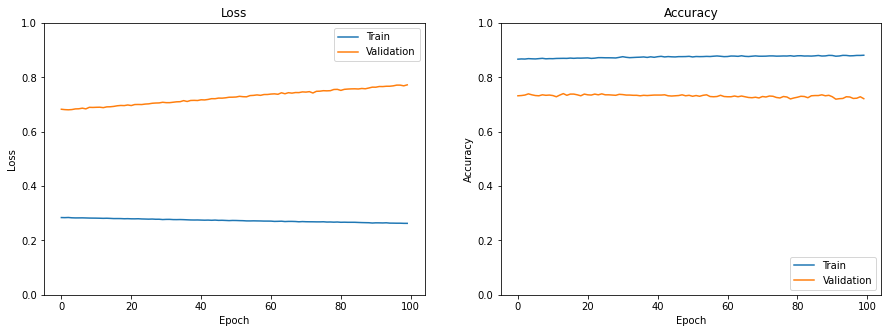

In [189]:
# Membuat grafik loss dan accuracy dari training
loss_accuracy(history)

In [94]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_probability = model.predict(X_test_final)
y_pred = np.where(y_pred_probability>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred))

44/44 [==============================] - 0s 988us/step
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1032
           1       0.49      0.54      0.51       373

    accuracy                           0.73      1405
   macro avg       0.66      0.67      0.66      1405
weighted avg       0.74      0.73      0.73      1405



## Functional API

In [95]:
# memanggil dictionary history dalam dataframe
metrics_2 = pd.DataFrame(history_2.history)
metrics_2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.362788,0.827509,0.462523,0.773132
1,0.362392,0.826619,0.463058,0.771352
2,0.362101,0.827064,0.463578,0.770463
3,0.361646,0.827732,0.464066,0.771352
4,0.361297,0.827732,0.464561,0.770463


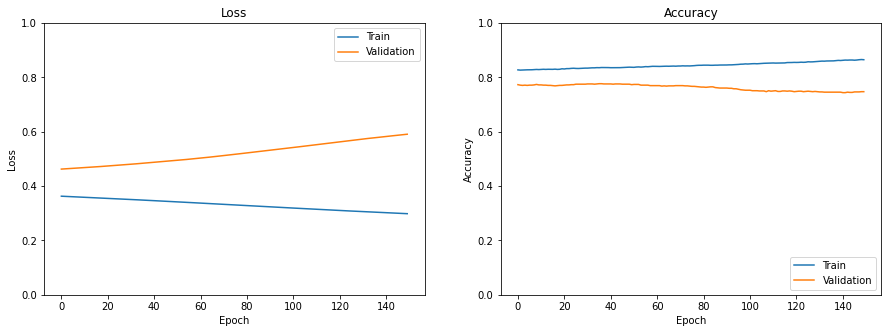

In [191]:
# Membuat grafik loss dan accuracy dari training
loss_accuracy(history_2)

In [108]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_2 = model_2.predict(X_test_final)
y_pred_2 = np.where(y_pred_2>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_2))

44/44 [==============================] - 0s 954us/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1032
           1       0.59      0.53      0.56       373

    accuracy                           0.78      1405
   macro avg       0.71      0.70      0.70      1405
weighted avg       0.77      0.78      0.77      1405



# 9. Model Optimization

Model dari functional API akan dilakukan  optimization meliputi penentuan penambahan jumlah hidden layer, neuron, learning rate, dropout, optimizer, dan weight inisiation

## Menambahkan Dropout dan 1 hidden layer ke model

In [136]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(30, activation='elu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(15, activation='elu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(8, activation='elu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)

output = Dense(1, activation='sigmoid')(hidden_drop_3)

model_3 = Model(inputs=data_in, outputs=output)

# compile
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [137]:
# train model
history_3 = model_3.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
141/141 [==============================] - 1s 3ms/step - loss: 0.5241 - accuracy: 0.7443 - val_loss: 0.4294 - val_accuracy: 0.7980
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7679 - val_loss: 0.4210 - val_accuracy: 0.7989
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7752 - val_loss: 0.4174 - val_accuracy: 0.8007
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7897 - val_loss: 0.4152 - val_accuracy: 0.8025
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7779 - val_loss: 0.4121 - val_accuracy: 0.7989
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7843 - val_loss: 0.4126 - val_accuracy: 0.8043
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7874 - val_loss: 0.4127 - val_accuracy: 0.8007

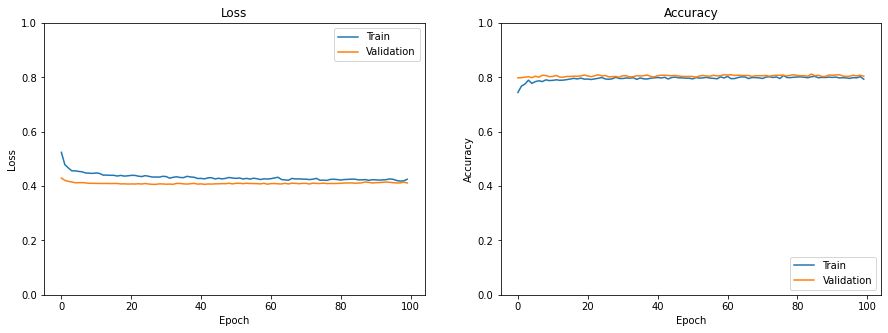

In [192]:
# melihat grafik loss akurasinya
loss_accuracy(history_3)

In [139]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_3 = model_3.predict(X_test_final)
y_pred_3 = np.where(y_pred_3>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_3))

44/44 [==============================] - 0s 884us/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1032
           1       0.69      0.54      0.61       373

    accuracy                           0.81      1405
   macro avg       0.77      0.73      0.74      1405
weighted avg       0.81      0.81      0.81      1405



> Terlihat datanya mengalami sedikit gradient exploding, maka akan dilakukan gradient clipping

## Menambahkan gradient clipping pada adam optimizer

In [140]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(30, activation='elu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(15, activation='elu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(8, activation='elu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)

output = Dense(1, activation='sigmoid')(hidden_drop_3)

model_4 = Model(inputs=data_in, outputs=output)

# compile
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(clipnorm=1.0),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [141]:
# train model
history_4 = model_4.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
141/141 [==============================] - 1s 2ms/step - loss: 0.6052 - accuracy: 0.6828 - val_loss: 0.4849 - val_accuracy: 0.7527
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7594 - val_loss: 0.4354 - val_accuracy: 0.7936
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7783 - val_loss: 0.4246 - val_accuracy: 0.8043
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7685 - val_loss: 0.4193 - val_accuracy: 0.8016
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7843 - val_loss: 0.4182 - val_accuracy: 0.8043
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.7906 - val_loss: 0.4167 - val_accuracy: 0.8043
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7830 - val_loss: 0.4154 - val_accuracy: 0.8016

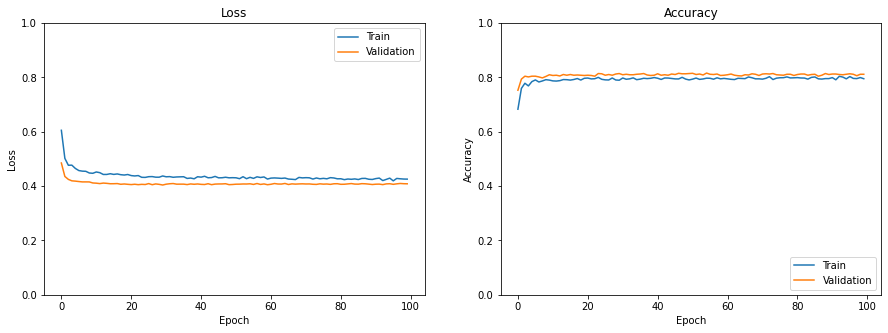

In [193]:
# melihat grafik loss akurasinya
loss_accuracy(history_4)

In [143]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_4 = model_4.predict(X_test_final)
y_pred_4 = np.where(y_pred_4>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_4))

44/44 [==============================] - 0s 977us/step
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1032
           1       0.69      0.51      0.58       373

    accuracy                           0.81      1405
   macro avg       0.76      0.71      0.73      1405
weighted avg       0.80      0.81      0.80      1405



> terlihat model sedikit membaik dari segi gradien yang lebih stabil.

## Menambahkan 5 hidden layer

In [218]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(30, activation='elu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(15, activation='elu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(8, activation='elu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (8,8,8,6,5):
    x = Dense(n, activation='elu')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_5 = Model(inputs=data_in, outputs=output)

# compile
model_5.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [200]:
model_5.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 46)]              0         
                                                                 
 dense_192 (Dense)           (None, 30)                1410      
                                                                 
 dropout_149 (Dropout)       (None, 30)                0         
                                                                 
 dense_193 (Dense)           (None, 15)                465       
                                                                 
 dropout_150 (Dropout)       (None, 15)                0         
                                                                 
 dense_194 (Dense)           (None, 8)                 128       
                                                                 
 dropout_151 (Dropout)       (None, 8)                 0  

In [219]:
# train model
history_5 = model_5.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
141/141 [==============================] - 1s 4ms/step - loss: 0.6342 - accuracy: 0.6744 - val_loss: 0.5073 - val_accuracy: 0.7411
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.5615 - accuracy: 0.7369 - val_loss: 0.4551 - val_accuracy: 0.8052
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.5387 - accuracy: 0.7501 - val_loss: 0.4424 - val_accuracy: 0.7972
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.5137 - accuracy: 0.7485 - val_loss: 0.4288 - val_accuracy: 0.7954
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.7545 - val_loss: 0.4285 - val_accuracy: 0.8016
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7550 - val_loss: 0.4307 - val_accuracy: 0.7989
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.7572 - val_loss: 0.4254 - val_accuracy: 0.7963

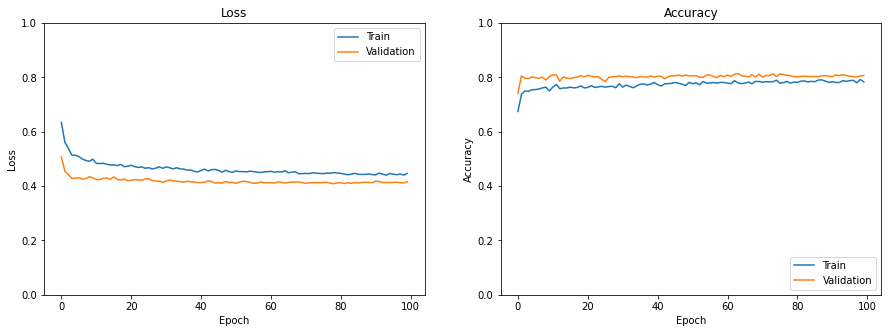

In [220]:
# melihat grafik loss akurasinya
loss_accuracy(history_5)

In [221]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_5 = model_5.predict(X_test_final)
y_pred_5 = np.where(y_pred_5>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_5))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1032
           1       0.71      0.49      0.58       373

    accuracy                           0.81      1405
   macro avg       0.77      0.71      0.73      1405
weighted avg       0.80      0.81      0.80      1405



## Menambahkan jumlah neuron di setiap hidden layer

In [166]:
X_train_final.shape

(4493, 46)

In [179]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='elu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='elu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='elu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (40,30,25,20,10):
    x = Dense(n, activation='elu')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_6 = Model(inputs=data_in, outputs=output)

# compile
model_6.compile(
    optimizer=tf.keras.optimizers.Adam(clipnorm=1.0),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [223]:
# train model
history_6 = model_6.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
141/141 [==============================] - 2s 5ms/step - loss: 0.5767 - accuracy: 0.7254 - val_loss: 0.4941 - val_accuracy: 0.7340
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.5134 - accuracy: 0.7329 - val_loss: 0.4680 - val_accuracy: 0.7340
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4943 - accuracy: 0.7345 - val_loss: 0.4676 - val_accuracy: 0.7340
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4877 - accuracy: 0.7343 - val_loss: 0.4627 - val_accuracy: 0.7340
Epoch 5/100
141/141 [==============================] - 0s 4ms/step - loss: 0.4840 - accuracy: 0.7345 - val_loss: 0.4785 - val_accuracy: 0.7340
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7345 - val_loss: 0.4647 - val_accuracy: 0.7340
Epoch 7/100
141/141 [==============================] - 0s 4ms/step - loss: 0.4754 - accuracy: 0.7345 - val_loss: 0.4704 - val_accuracy: 0.7340

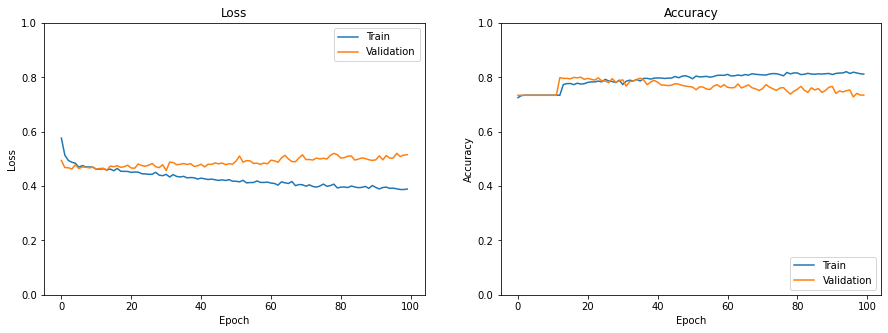

In [224]:
# melihat grafik loss akurasinya
loss_accuracy(history_6)

In [225]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_6 = model_6.predict(X_test_final)
y_pred_6 = np.where(y_pred_6>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_6))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1032
           1       0.52      0.73      0.61       373

    accuracy                           0.75      1405
   macro avg       0.70      0.74      0.71      1405
weighted avg       0.79      0.75      0.76      1405



## Mencoba mengganti activation function menjadi relu

In [184]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='relu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='relu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (40,30,25,20,10):
    x = Dense(n, activation='relu')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_7 = Model(inputs=data_in, outputs=output)

# compile
model_7.compile(
    optimizer=tf.keras.optimizers.Adam(clipnorm=1.0),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [185]:
# train model
history_7 = model_7.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
141/141 [==============================] - 2s 4ms/step - loss: 0.6115 - accuracy: 0.7055 - val_loss: 0.5012 - val_accuracy: 0.7340
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7345 - val_loss: 0.4622 - val_accuracy: 0.7340
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.7345 - val_loss: 0.4639 - val_accuracy: 0.7340
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7345 - val_loss: 0.4612 - val_accuracy: 0.7340
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.7345 - val_loss: 0.4699 - val_accuracy: 0.7340
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.7345 - val_loss: 0.4705 - val_accuracy: 0.7340
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4677 - accuracy: 0.7345 - val_loss: 0.4704 - val_accuracy: 0.7340

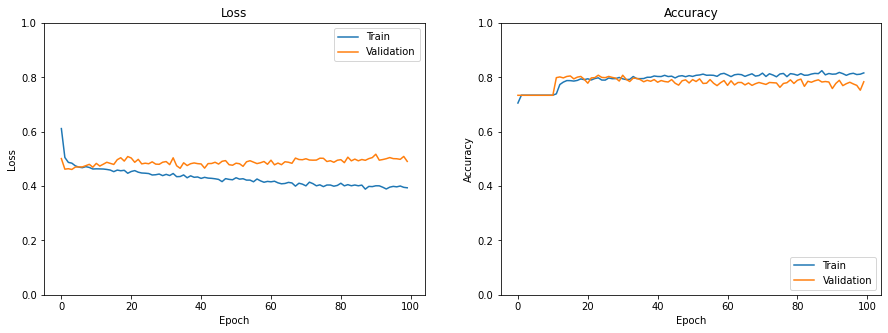

In [197]:
# melihat grafik loss akurasinya
loss_accuracy(history_7)

In [213]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_7 = model_7.predict(X_test_final)
y_pred_7 = np.where(y_pred_7>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_7))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.98      0.84      1032
           1       0.35      0.03      0.06       373

    accuracy                           0.73      1405
   macro avg       0.54      0.51      0.45      1405
weighted avg       0.63      0.73      0.63      1405



> berdasarkan grafik loss dan ackurasinya, model semakin kurang baik

## Mencoba optimizer lainnya

### Optimizer Adagrad

In [204]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='elu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='elu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='elu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (40,30,25,20,10):
    x = Dense(n, activation='elu')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_7 = Model(inputs=data_in, outputs=output)

# compile
model_7.compile(
    optimizer=tf.keras.optimizers.Adagrad(),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [205]:
# train model
history_7 = model_7.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
141/141 [==============================] - 2s 6ms/step - loss: 0.6795 - accuracy: 0.5967 - val_loss: 0.5330 - val_accuracy: 0.7562
Epoch 2/100
141/141 [==============================] - 1s 5ms/step - loss: 0.6167 - accuracy: 0.6648 - val_loss: 0.5037 - val_accuracy: 0.7544
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.6039 - accuracy: 0.6949 - val_loss: 0.4901 - val_accuracy: 0.7553
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.5841 - accuracy: 0.7075 - val_loss: 0.4806 - val_accuracy: 0.7589
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 0.5729 - accuracy: 0.7109 - val_loss: 0.4726 - val_accuracy: 0.7607
Epoch 6/100
141/141 [==============================] - 1s 5ms/step - loss: 0.5677 - accuracy: 0.7124 - val_loss: 0.4665 - val_accuracy: 0.7660
Epoch 7/100
141/141 [==============================] - 1s 4ms/step - loss: 0.5660 - accuracy: 0.7111 - val_loss: 0.4601 - val_accuracy: 0.7740

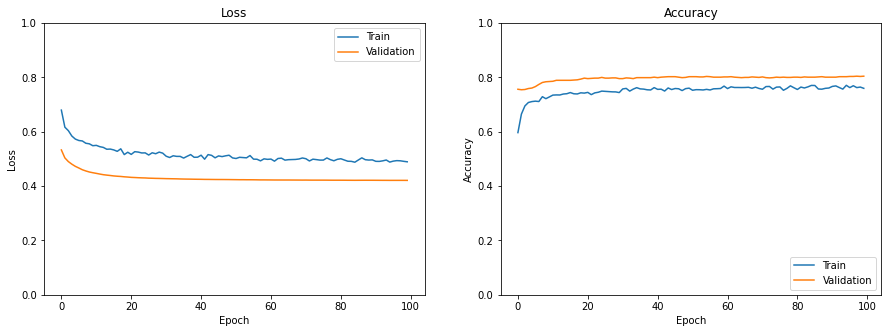

In [206]:
# melihat grafik loss akurasinya
loss_accuracy(history_7)

In [215]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_7 = model_7.predict(X_test_final)
y_pred_7 = np.where(y_pred_7>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_7))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.98      0.84      1032
           1       0.35      0.03      0.06       373

    accuracy                           0.73      1405
   macro avg       0.54      0.51      0.45      1405
weighted avg       0.63      0.73      0.63      1405



### Optimizer RMSprop

In [210]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='relu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='relu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (40,30,25,20,10):
    x = Dense(n, activation='relu')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_8 = Model(inputs=data_in, outputs=output)

# compile
model_8.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_8 = model_8.fit(train_dataset, epochs=100, validation_data=(val_dataset))

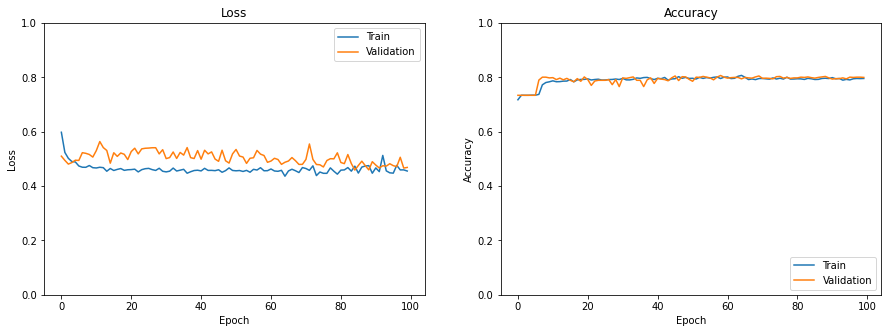

In [212]:
# melihat grafik loss akurasinya
loss_accuracy(history_8)

In [217]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_8 = model_8.predict(X_test_final)
y_pred_8 = np.where(y_pred_8>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_8))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1032
           1       0.69      0.54      0.61       373

    accuracy                           0.81      1405
   macro avg       0.77      0.73      0.74      1405
weighted avg       0.80      0.81      0.81      1405



### Optimizer SGD dengan penentuan weight initialization serta activation function

#### SGD dengan activation relu

In [227]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='relu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='relu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (40,30,25,20,10):
    x = Dense(n, activation='relu')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_9 = Model(inputs=data_in, outputs=output)

# compile
model_9.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_9 = model_9.fit(train_dataset, epochs=50, validation_data=(val_dataset))

Epoch 1/50
141/141 [==============================] - 2s 4ms/step - loss: 0.6306 - accuracy: 0.7069 - val_loss: 0.5858 - val_accuracy: 0.7340
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.7340 - val_loss: 0.5697 - val_accuracy: 0.7340
Epoch 3/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5831 - accuracy: 0.7345 - val_loss: 0.5646 - val_accuracy: 0.7340
Epoch 4/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.7345 - val_loss: 0.5580 - val_accuracy: 0.7340
Epoch 5/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7345 - val_loss: 0.5504 - val_accuracy: 0.7340
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7345 - val_loss: 0.5408 - val_accuracy: 0.7340
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.7345 - val_loss: 0.5300 - val_accuracy: 0.7340
Epoch 

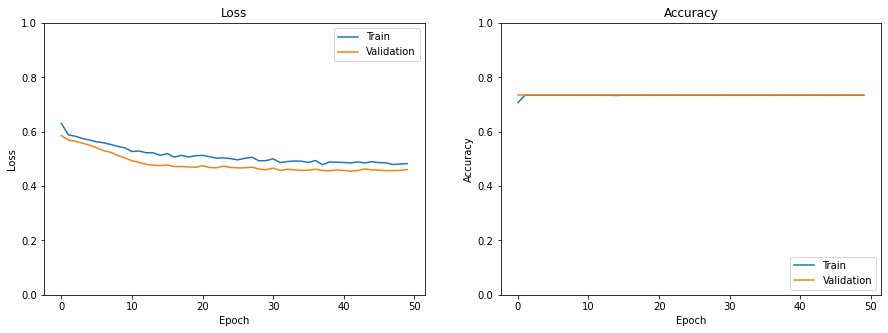

In [228]:
# melihat grafik loss akurasinya
loss_accuracy(history_9)

> Terlihat terjadi gradient vanishing, sehingga akan dicoba menggunakan fungsi aktivasi lainnya, weight initiator, dan batch normalization.

In [235]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_9 = model_9.predict(X_test_final)
y_pred_9 = np.where(y_pred_9>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_9))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1032
           1       0.00      0.00      0.00       373

    accuracy                           0.73      1405
   macro avg       0.37      0.50      0.42      1405
weighted avg       0.54      0.73      0.62      1405



c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### Menggunakan Weight initializer HeNormal dan Activation Function relu

In [233]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='relu', kernel_initializer='HeNormal')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='relu', kernel_initializer='HeNormal')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='relu',kernel_initializer='HeNormal')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (30,30,25,20,10):
    x = Dense(n, activation='relu',kernel_initializer='HeNormal')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_10 = Model(inputs=data_in, outputs=output)

# compile
model_10.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_10 = model_10.fit(train_dataset, epochs=50, validation_data=(val_dataset))

Epoch 1/50
141/141 [==============================] - 1s 4ms/step - loss: 0.7311 - accuracy: 0.5762 - val_loss: 0.6085 - val_accuracy: 0.7340
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.7069 - val_loss: 0.5944 - val_accuracy: 0.7340
Epoch 3/50
141/141 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.7298 - val_loss: 0.5878 - val_accuracy: 0.7340
Epoch 4/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.7318 - val_loss: 0.5843 - val_accuracy: 0.7340
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7325 - val_loss: 0.5810 - val_accuracy: 0.7340
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5875 - accuracy: 0.7336 - val_loss: 0.5797 - val_accuracy: 0.7340
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.7338 - val_loss: 0.5777 - val_accuracy: 0.7340
Epoch 

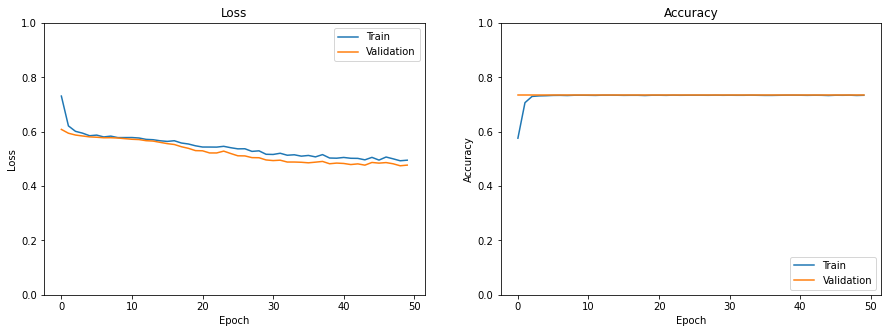

In [234]:
# melihat grafik loss akurasinya
loss_accuracy(history_10)

In [236]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_10 = model_10.predict(X_test_final)
y_pred_10 = np.where(y_pred_10>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_10))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1032
           1       0.00      0.00      0.00       373

    accuracy                           0.73      1405
   macro avg       0.37      0.50      0.42      1405
weighted avg       0.54      0.73      0.62      1405



c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### Menggunakan Weight initializer HeUniform dan Activation Function relu

In [240]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='relu', kernel_initializer='HeUniform')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='relu', kernel_initializer='HeUniform')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='relu',kernel_initializer='HeUniform')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (30,30,25,20,10):
    x = Dense(n, activation='relu',kernel_initializer='HeUniform')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_11 = Model(inputs=data_in, outputs=output)

# compile
model_11.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_11 = model_11.fit(train_dataset, epochs=50, validation_data=(val_dataset))

Epoch 1/50
141/141 [==============================] - 1s 5ms/step - loss: 0.6695 - accuracy: 0.6857 - val_loss: 0.6292 - val_accuracy: 0.7340
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.7229 - val_loss: 0.6127 - val_accuracy: 0.7340
Epoch 3/50
141/141 [==============================] - 0s 4ms/step - loss: 0.5944 - accuracy: 0.7300 - val_loss: 0.5977 - val_accuracy: 0.7340
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5772 - accuracy: 0.7320 - val_loss: 0.5816 - val_accuracy: 0.7340
Epoch 5/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5685 - accuracy: 0.7331 - val_loss: 0.5715 - val_accuracy: 0.7340
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.7338 - val_loss: 0.5569 - val_accuracy: 0.7340
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5599 - accuracy: 0.7343 - val_loss: 0.5526 - val_accuracy: 0.7340
Epoch 

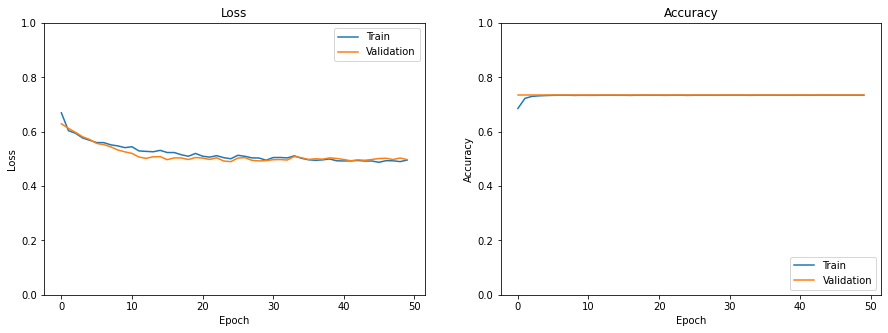

In [241]:
# melihat grafik loss akurasinya
loss_accuracy(history_11)

In [245]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_11 = model_11.predict(X_test_final)
y_pred_11 = np.where(y_pred_11>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_11))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1032
           1       0.00      0.00      0.00       373

    accuracy                           0.73      1405
   macro avg       0.37      0.50      0.42      1405
weighted avg       0.54      0.73      0.62      1405



c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

> Tidak ada pengaruh menggunakan HeNormal dan HeUniform sebagai weigh initializernya.

#### Menggunakan Weight initializer HeUniform dan Activation Function relu

In [243]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='tanh', kernel_initializer='GlorotNormal')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='tanh', kernel_initializer='GlorotNormal')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='tanh',kernel_initializer='GlorotNormal')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (30,30,25,20,10):
    x = Dense(n, activation='tanh',kernel_initializer='GlorotNormal')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_12 = Model(inputs=data_in, outputs=output)

# compile
model_12.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_12 = model_12.fit(train_dataset, epochs=50, validation_data=(val_dataset))

Epoch 1/50
141/141 [==============================] - 2s 5ms/step - loss: 0.6359 - accuracy: 0.6539 - val_loss: 0.5405 - val_accuracy: 0.7340
Epoch 2/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5798 - accuracy: 0.7202 - val_loss: 0.5030 - val_accuracy: 0.7340
Epoch 3/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.7285 - val_loss: 0.4583 - val_accuracy: 0.7633
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5311 - accuracy: 0.7447 - val_loss: 0.4374 - val_accuracy: 0.8016
Epoch 5/50
141/141 [==============================] - 0s 4ms/step - loss: 0.5167 - accuracy: 0.7501 - val_loss: 0.4312 - val_accuracy: 0.7945
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4987 - accuracy: 0.7601 - val_loss: 0.4306 - val_accuracy: 0.7918
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 0.7532 - val_loss: 0.4288 - val_accuracy: 0.7891
Epoch 

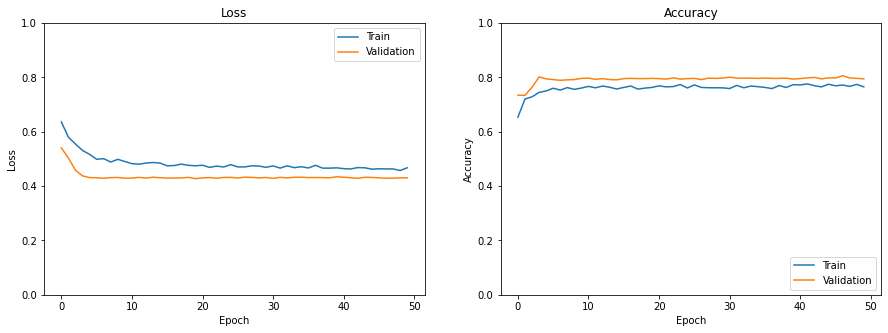

In [244]:
# melihat grafik loss akurasinya
loss_accuracy(history_12)

In [246]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_12 = model_12.predict(X_test_final)
y_pred_12 = np.where(y_pred_12>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_12))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1032
           1       0.59      0.68      0.63       373

    accuracy                           0.79      1405
   macro avg       0.73      0.76      0.74      1405
weighted avg       0.80      0.79      0.79      1405



#### Menggunakan Weight initializer GlorotUniform dan Activation Function tanh

In [247]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='tanh', kernel_initializer='GlorotUniform')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='tanh', kernel_initializer='GlorotUniform')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='tanh',kernel_initializer='GlorotUniform')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (30,30,25,20,10):
    x = Dense(n, activation='tanh',kernel_initializer='GlorotUniform')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_13 = Model(inputs=data_in, outputs=output)

# compile
model_13.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_13 = model_13.fit(train_dataset, epochs=50, validation_data=(val_dataset))

Epoch 1/50
141/141 [==============================] - 2s 6ms/step - loss: 0.6146 - accuracy: 0.6748 - val_loss: 0.5250 - val_accuracy: 0.7340
Epoch 2/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5628 - accuracy: 0.7285 - val_loss: 0.4724 - val_accuracy: 0.7456
Epoch 3/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5320 - accuracy: 0.7458 - val_loss: 0.4408 - val_accuracy: 0.7820
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5183 - accuracy: 0.7492 - val_loss: 0.4289 - val_accuracy: 0.7972
Epoch 5/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5176 - accuracy: 0.7505 - val_loss: 0.4264 - val_accuracy: 0.7980
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.7543 - val_loss: 0.4254 - val_accuracy: 0.7936
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7556 - val_loss: 0.4263 - val_accuracy: 0.7918
Epoch 

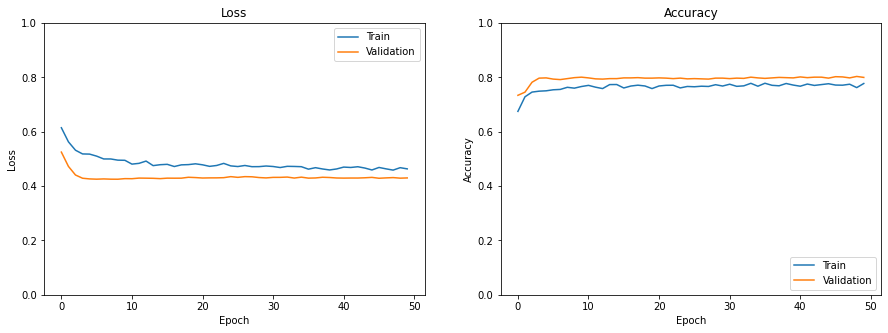

In [248]:
# melihat grafik loss akurasinya
loss_accuracy(history_13)

In [249]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_13 = model_13.predict(X_test_final)
y_pred_13 = np.where(y_pred_13>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_13))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1032
           1       0.59      0.68      0.64       373

    accuracy                           0.79      1405
   macro avg       0.74      0.76      0.74      1405
weighted avg       0.80      0.79      0.80      1405



#### Menggunakan Weight initializer GlorotUniform dan Activation Function softmax

In [251]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='softmax', kernel_initializer='GlorotUniform')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='softmax', kernel_initializer='GlorotUniform')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='softmax',kernel_initializer='GlorotUniform')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (30,30,25,20,10):
    x = Dense(n, activation='softmax',kernel_initializer='GlorotUniform')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_14 = Model(inputs=data_in, outputs=output)

# compile
model_14.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_14 = model_14.fit(train_dataset, epochs=50, validation_data=(val_dataset))

Epoch 1/50
141/141 [==============================] - 2s 5ms/step - loss: 0.6589 - accuracy: 0.6993 - val_loss: 0.6323 - val_accuracy: 0.7340
Epoch 2/50
141/141 [==============================] - 1s 4ms/step - loss: 0.6176 - accuracy: 0.7345 - val_loss: 0.6051 - val_accuracy: 0.7340
Epoch 3/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5992 - accuracy: 0.7345 - val_loss: 0.5922 - val_accuracy: 0.7340
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5888 - accuracy: 0.7345 - val_loss: 0.5858 - val_accuracy: 0.7340
Epoch 5/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5841 - accuracy: 0.7345 - val_loss: 0.5826 - val_accuracy: 0.7340
Epoch 6/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5826 - accuracy: 0.7345 - val_loss: 0.5810 - val_accuracy: 0.7340
Epoch 7/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5809 - accuracy: 0.7345 - val_loss: 0.5802 - val_accuracy: 0.7340
Epoch 

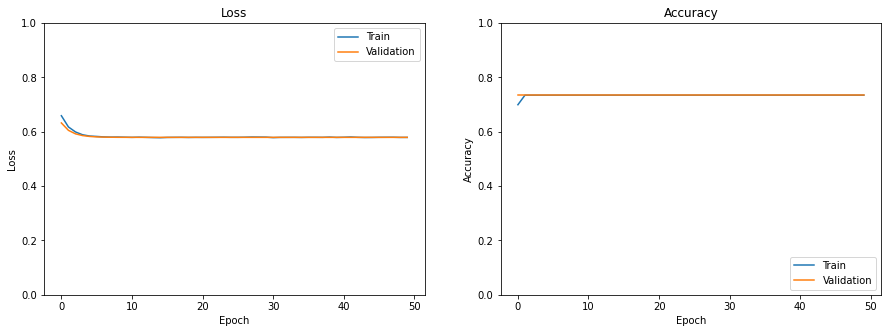

In [252]:
# melihat grafik loss akurasinya
loss_accuracy(history_14)

In [253]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_14 = model_14.predict(X_test_final)
y_pred_14 = np.where(y_pred_14>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_14))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1032
           1       0.00      0.00      0.00       373

    accuracy                           0.73      1405
   macro avg       0.37      0.50      0.42      1405
weighted avg       0.54      0.73      0.62      1405



c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jimmy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

> Terlihat dari keseluruhan tes dengan optimizer SGD, dalam kasus ini paling baik SGD dengan GlorotUniform sebagai weight initialization dan tanh sebagai activation function.

## Melakukan Optimasi khusus pada Optimizer RMS Prop ( model 8 ) karena memiliki nilai Akurasi dan F1 terbaik

### Percobaan dengan activation function elu

In [254]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='elu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='elu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='elu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (40,30,25,20,10):
    x = Dense(n, activation='elu')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_15 = Model(inputs=data_in, outputs=output)

# compile
model_15.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_15 = model_15.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
141/141 [==============================] - 4s 5ms/step - loss: 0.5758 - accuracy: 0.7107 - val_loss: 0.4317 - val_accuracy: 0.8025
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4973 - accuracy: 0.7607 - val_loss: 0.4264 - val_accuracy: 0.7998
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4889 - accuracy: 0.7670 - val_loss: 0.4286 - val_accuracy: 0.7963
Epoch 4/100
141/141 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7672 - val_loss: 0.4182 - val_accuracy: 0.8043
Epoch 5/100
141/141 [==============================] - 0s 4ms/step - loss: 0.4730 - accuracy: 0.7712 - val_loss: 0.4188 - val_accuracy: 0.8078
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4631 - accuracy: 0.7777 - val_loss: 0.4182 - val_accuracy: 0.7998
Epoch 7/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4605 - accuracy: 0.7814 - val_loss: 0.4208 - val_accuracy: 0.8025

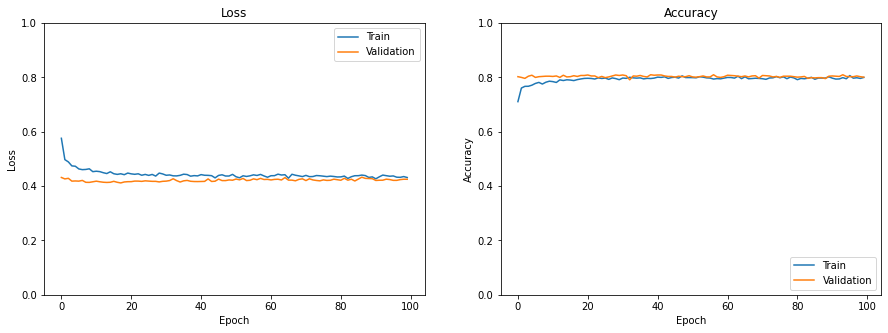

In [255]:
# melihat grafik loss akurasinya
loss_accuracy(history_15)

In [256]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_15 = model_15.predict(X_test_final)
y_pred_15 = np.where(y_pred_15>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_15))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1032
           1       0.70      0.47      0.56       373

    accuracy                           0.81      1405
   macro avg       0.76      0.70      0.72      1405
weighted avg       0.79      0.81      0.79      1405



> hasil elu kurang baik, maka dilakukan percobaan berserta weight initializationnya

### Percobaan dengan GlorotUniform dan tanh

In [257]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='tanh', kernel_initializer='GlorotUniform')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='tanh',kernel_initializer='GlorotUniform')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='tanh',kernel_initializer='GlorotUniform')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (40,30,25,20,10):
    x = Dense(n, activation='tanh',kernel_initializer='GlorotUniform')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_16 = Model(inputs=data_in, outputs=output)

# compile
model_16.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_16 = model_16.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
141/141 [==============================] - 2s 5ms/step - loss: 0.5500 - accuracy: 0.7289 - val_loss: 0.4312 - val_accuracy: 0.8043
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4964 - accuracy: 0.7670 - val_loss: 0.4291 - val_accuracy: 0.8025
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4860 - accuracy: 0.7732 - val_loss: 0.4276 - val_accuracy: 0.8007
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7728 - val_loss: 0.4228 - val_accuracy: 0.8025
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4717 - accuracy: 0.7799 - val_loss: 0.4258 - val_accuracy: 0.8034
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.7759 - val_loss: 0.4248 - val_accuracy: 0.8060
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.7757 - val_loss: 0.4240 - val_accuracy: 0.8052

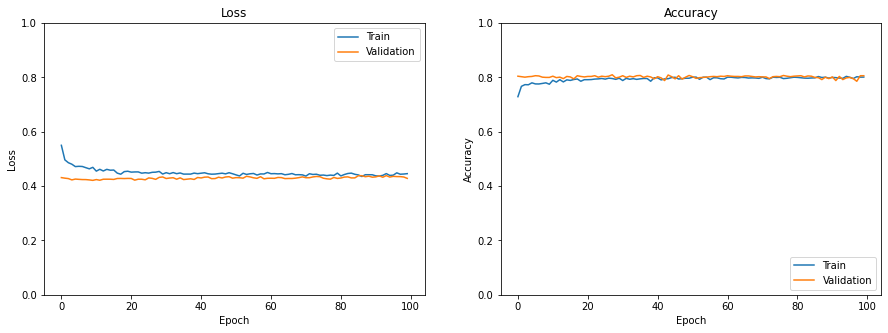

In [258]:
# melihat grafik loss akurasinya
loss_accuracy(history_16)

In [259]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_16 = model_16.predict(X_test_final)
y_pred_16 = np.where(y_pred_16>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_16))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1032
           1       0.67      0.55      0.60       373

    accuracy                           0.81      1405
   macro avg       0.76      0.72      0.74      1405
weighted avg       0.80      0.81      0.80      1405



> berhubung paling bagus tetap model 8 maka dilakukan pengurangan epoch ke nilai yang dianggap optimal pada model 8

### Pengurangan Epoch pada model 8

In [272]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='relu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='relu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (40,30,25,20,10):
    x = Dense(n, activation='relu')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_8b = Model(inputs=data_in, outputs=output)

# compile
model_8b.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_8b = model_8b.fit(train_dataset, epochs=90, validation_data=(val_dataset))

Epoch 1/90
141/141 [==============================] - 3s 6ms/step - loss: 0.5706 - accuracy: 0.7156 - val_loss: 0.4930 - val_accuracy: 0.7340
Epoch 2/90
141/141 [==============================] - 1s 4ms/step - loss: 0.5143 - accuracy: 0.7334 - val_loss: 0.4688 - val_accuracy: 0.7340
Epoch 3/90
141/141 [==============================] - 1s 4ms/step - loss: 0.4885 - accuracy: 0.7331 - val_loss: 0.4671 - val_accuracy: 0.7340
Epoch 4/90
141/141 [==============================] - 1s 4ms/step - loss: 0.4862 - accuracy: 0.7343 - val_loss: 0.4902 - val_accuracy: 0.7340
Epoch 5/90
141/141 [==============================] - 1s 4ms/step - loss: 0.4778 - accuracy: 0.7338 - val_loss: 0.4829 - val_accuracy: 0.7340
Epoch 6/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7345 - val_loss: 0.4894 - val_accuracy: 0.7340
Epoch 7/90
141/141 [==============================] - 1s 4ms/step - loss: 0.4777 - accuracy: 0.7469 - val_loss: 0.4812 - val_accuracy: 0.7972
Epoch 

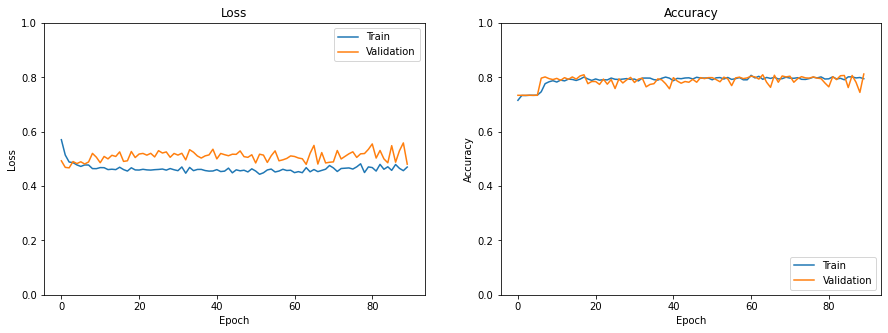

In [273]:
# melihat grafik loss akurasinya
loss_accuracy(history_8b)

In [274]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_8b = model_8b.predict(X_test_final)
y_pred_8b = np.where(y_pred_8b>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_8b))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1032
           1       0.65      0.63      0.64       373

    accuracy                           0.81      1405
   macro avg       0.76      0.75      0.76      1405
weighted avg       0.81      0.81      0.81      1405



### Mengubah learning rate pada model 8b

In [286]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='relu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='relu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (40,30,25,20,10):
    x = Dense(n, activation='relu')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_8c = Model(inputs=data_in, outputs=output)

# compile
model_8c.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.002),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_8c = model_8c.fit(train_dataset, epochs=90, validation_data=(val_dataset))

Epoch 1/90
141/141 [==============================] - 2s 4ms/step - loss: 0.5260 - accuracy: 0.7287 - val_loss: 0.4669 - val_accuracy: 0.7340
Epoch 2/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7343 - val_loss: 0.5225 - val_accuracy: 0.7340
Epoch 3/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.7343 - val_loss: 0.5202 - val_accuracy: 0.7340
Epoch 4/90
141/141 [==============================] - 0s 4ms/step - loss: 0.4855 - accuracy: 0.7345 - val_loss: 0.5315 - val_accuracy: 0.7340
Epoch 5/90
141/141 [==============================] - 1s 4ms/step - loss: 0.4777 - accuracy: 0.7452 - val_loss: 0.5357 - val_accuracy: 0.7989
Epoch 6/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7777 - val_loss: 0.5071 - val_accuracy: 0.7980
Epoch 7/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.7828 - val_loss: 0.5127 - val_accuracy: 0.7998
Epoch 

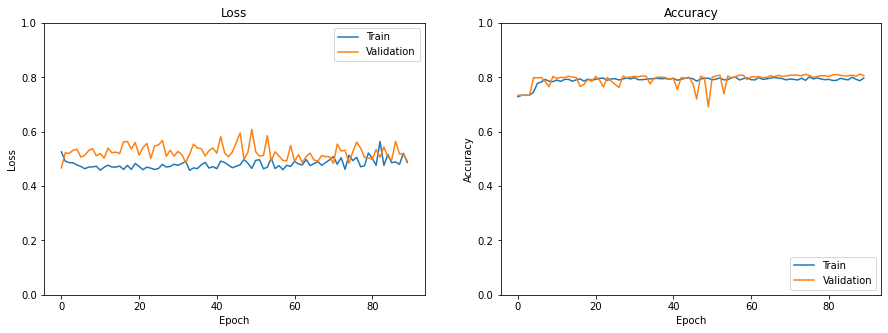

In [287]:
# melihat grafik loss akurasinya
loss_accuracy(history_8c)

In [285]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_8c = model_8c.predict(X_test_final)
y_pred_8c = np.where(y_pred_8c>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_8c))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1032
           1       0.61      0.65      0.63       373

    accuracy                           0.80      1405
   macro avg       0.74      0.75      0.75      1405
weighted avg       0.80      0.80      0.80      1405



> Hyperparameter learning rate yang sedikit lebih cepat tidak begitu mempengaruhi, sehingga digunakan hyperparameter awal.

# Mencoba merubah Rho pada model 8

In [ ]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='relu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='relu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)

output = Dense(1, activation='sigmoid')(hidden_drop_3)

model_8d = Model(inputs=data_in, outputs=output)

# compile
model_8d.compile(
    optimizer=tf.keras.optimizers.RMSprop(rho= 0.95),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_8d = model_8d.fit(train_dataset, epochs=90, validation_data=(val_dataset))

In [71]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='relu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='relu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (40,30,25,20,10):
    x = Dense(n, activation='relu')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_8d = Model(inputs=data_in, outputs=output)

# compile
model_8d.compile(
    optimizer=tf.keras.optimizers.RMSprop(rho= 0.95),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_8d = model_8d.fit(train_dataset, epochs=90, validation_data=(val_dataset))

Epoch 1/90
141/141 [==============================] - 3s 6ms/step - loss: 0.5631 - accuracy: 0.7311 - val_loss: 0.4858 - val_accuracy: 0.7340
Epoch 2/90
141/141 [==============================] - 1s 4ms/step - loss: 0.5148 - accuracy: 0.7345 - val_loss: 0.4788 - val_accuracy: 0.7340
Epoch 3/90
141/141 [==============================] - 1s 4ms/step - loss: 0.4897 - accuracy: 0.7345 - val_loss: 0.4732 - val_accuracy: 0.7340
Epoch 4/90
141/141 [==============================] - 1s 4ms/step - loss: 0.4803 - accuracy: 0.7345 - val_loss: 0.4831 - val_accuracy: 0.7340
Epoch 5/90
141/141 [==============================] - 1s 5ms/step - loss: 0.4747 - accuracy: 0.7345 - val_loss: 0.4686 - val_accuracy: 0.7340
Epoch 6/90
141/141 [==============================] - 1s 4ms/step - loss: 0.4673 - accuracy: 0.7345 - val_loss: 0.4814 - val_accuracy: 0.7340
Epoch 7/90
141/141 [==============================] - 1s 5ms/step - loss: 0.4679 - accuracy: 0.7345 - val_loss: 0.4875 - val_accuracy: 0.7340
Epoch 

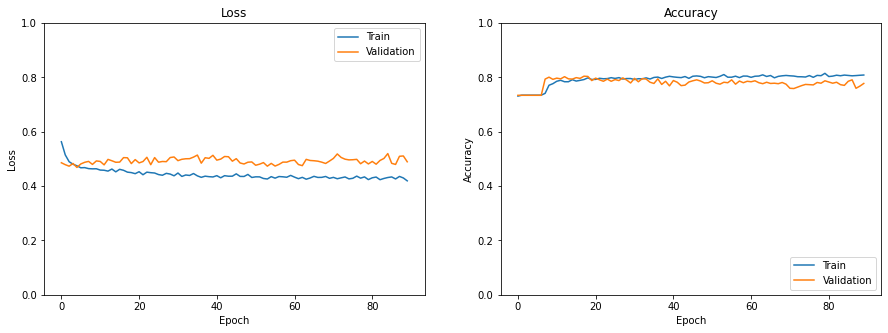

In [72]:
# melihat grafik loss akurasinya
loss_accuracy(history_8d)

In [73]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_8d = model_8d.predict(X_test_final)
y_pred_8d = np.where(y_pred_8d>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_8d))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1032
           1       0.62      0.64      0.63       373

    accuracy                           0.80      1405
   macro avg       0.74      0.75      0.75      1405
weighted avg       0.80      0.80      0.80      1405



> Model 8d dengan rho yang lebih besar ini dianggap lebih baik karena lebih tersebar merata di sisi f1 scorenya.

### Mencoba merubah epsilon dari model 8d

In [301]:
# Mendeklarasikan arsitektur
data_in = Input (shape=(X_train_final.shape[1],))
hidden_1 = Dense(40, activation='relu')(data_in)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(35, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(30, activation='relu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
x = hidden_drop_3
for n in (40,30,25,20,10):
    x = Dense(n, activation='relu')(x)
    x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model_8e = Model(inputs=data_in, outputs=output)

# compile
model_8e.compile(
    optimizer=tf.keras.optimizers.RMSprop(rho= 0.95, epsilon = 1e-8),
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
# train model
history_8e = model_8e.fit(train_dataset, epochs=90, validation_data=(val_dataset))

Epoch 1/90
141/141 [==============================] - 2s 4ms/step - loss: 0.5438 - accuracy: 0.7291 - val_loss: 0.4941 - val_accuracy: 0.7340
Epoch 2/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7343 - val_loss: 0.4995 - val_accuracy: 0.7340
Epoch 3/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4931 - accuracy: 0.7345 - val_loss: 0.4878 - val_accuracy: 0.7340
Epoch 4/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7345 - val_loss: 0.4918 - val_accuracy: 0.7340
Epoch 5/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.7345 - val_loss: 0.5172 - val_accuracy: 0.7340
Epoch 6/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7345 - val_loss: 0.5346 - val_accuracy: 0.7340
Epoch 7/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.7345 - val_loss: 0.5071 - val_accuracy: 0.7340
Epoch 

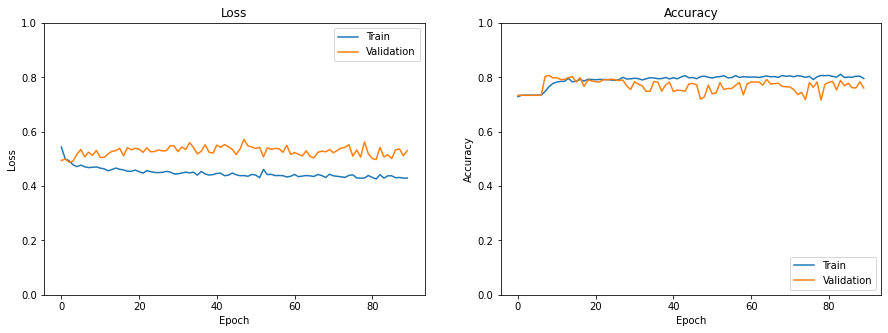

In [302]:
# melihat grafik loss akurasinya
loss_accuracy(history_8e)

In [303]:
# Melakukan prediksi pada data test dan membuat classification report
y_pred_8e = model_8e.predict(X_test_final)
y_pred_8e = np.where(y_pred_8e>= 0.5, 1,0)
print(classification_report(y_test_final, y_pred_8e))

44/44 [==============================] - 0s 954us/step
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1032
           1       0.54      0.75      0.63       373

    accuracy                           0.76      1405
   macro avg       0.72      0.76      0.73      1405
weighted avg       0.80      0.76      0.77      1405



> Nilai Epsilonnya lebih bagus yang default, sehingga tetap digunakan model sebelumnya (8d)

# 9. Model Saving
Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [74]:
# save data_pipeline
with open('data_pipeline.pkl', 'wb') as f:
    pickle.dump(data_pipeline, f)

In [75]:
# save model_8d
model_8d.save('model_nn.h5')

# 10. Model Inference
Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [8]:
# load pipeline
with open('data_pipeline.pkl', 'rb') as f:
    data_pipeline_inf = pickle.load(f)

In [9]:
# load model
model_inf = keras.models.load_model('model_nn.h5')

In [10]:
model_inf.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense_27 (Dense)            (None, 40)                1880      
                                                                 
 dropout_24 (Dropout)        (None, 40)                0         
                                                                 
 dense_28 (Dense)            (None, 35)                1435      
                                                                 
 dropout_25 (Dropout)        (None, 35)                0         
                                                                 
 dense_29 (Dense)            (None, 30)                1080      
                                                                 
 dropout_26 (Dropout)        (None, 30)                0   

In [ ]:
# transform X_inf dengan pipeline
X_inf_final = data_pipeline_inf.transform(X_inf)

In [ ]:
# Melihat shape data inference final
X_inf_final.shape

(10, 46)

In [ ]:
# Melakukan prediksi pada data test dan membuat classification report
y_inf_pred = model_inf.predict(X_inf_final)
y_inf_pred = np.where(y_inf_pred>= 0.5, 'Yes','No')

1/1 [==============================] - 0s 20ms/step


In [ ]:
# Membuat df dari yang dipredict
compare_inf= pd.DataFrame()
compare_inf['y_inf']= y_inf
# Melihat perbedaan dar dan y_inf_test, true falsenya
compare_inf['y_inf_pred'] = y_inf_pred
compare_inf['Kecocokan'] = compare_inf['y_inf_pred'] == compare_inf['y_inf']
compare_inf

,y_inf,y_inf_pred,Kecocokan
0,No,No,True
1,No,No,True
2,No,No,True
3,Yes,No,False
4,Yes,Yes,True
5,Yes,No,False
6,No,Yes,False
7,No,Yes,False
8,Yes,No,False
9,No,Yes,False


> Berdasarkan data inference, model masih memiliki banyak kesalahan dalam memprediksi customer yang seharusnya churn menjadi tidak churn, sehingga masih perlu lebih banyak improvement.

# 11. Pengambilan Kesimpulan
Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## Kesimpulan
- Model neural network yang terbaik untuk kasus ini adalah Model RMSProp dengan rho = 0.95
- Model memiliki tingkat akurasi 0.80
- Namun model ini masih perlu dilakukan improvement agar akurasinya dapat lebih tinggi terutama untuk memprediksi customer yang seharusnya churn menjadi tidak churn.
<br><br>

## Implementasi bisnis:
- Dalam konteks bisnis, model ini dapat diimplementasikan pada bagian customer retention, dimana customer yang diprediksi tidak churn akan diberikan promosi reguler agar tetap menjadi customer yang loyal. Sebaliknya, customer yang kemungkinan churn akan ditawarkan promo khusus sesuai dengan karakteristik customer tersebut. 
- Dengan model ini, diharapkan dapat mengurangi customer retention cost dengan membagi bobot cost tersebut berdasarkan kemungkinan customer churnnya, sebagai berikut: menengah ke tinggi > menengah ke rendah > rendah > tinggi. Hal ini ditujukan agar dapat merubah customer yang mau churn menjadi retent, mempertahankan yang kemungkinan akan retent, dan 'membiarkan' atau meminimalkan cost untuk customer yang kemungkinan besar churn.
<br><br>

## Improvement untuk ke depannya:
- Memperbanyak data yang ditraining, serta fitur terutama fitur-fitur numerikal seperti jumlah pembelian, jumlah diskon, dll.
- Melakukan early stopping dan juga Hyperband Tuning agar bisa diperoleh model yang lebih baik.